In [20]:
dataDir = "6lu7/log336h_6lu7/data10/"
proteinName = "6lu7" # if dataDir includes 6lu7, proteinName is 6lu7, otherwise 3zosA
proteinName += "_prepared"

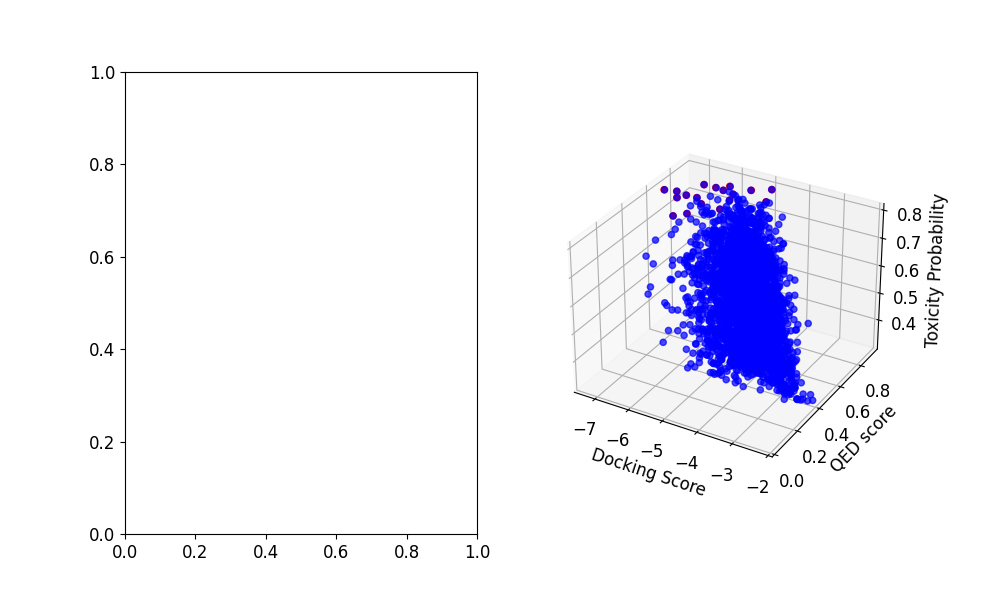

In [21]:
#GUI-part
#jupyterlab
%matplotlib widget
#jupyter notebook
#%matplotlib notebook
#GUI
#%matplotlib ipympl
#%matplotlib inline
import pandas as pd
import json
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, proj3d
from rdkit import Chem
from rdkit.Chem import Draw
import os
def rewardtoDocking(r: float)->float:
    return 10*r/(r-1)

def getMax(a: float , b: float ) -> float:
    return a if a> b else b

def getMin(a: float , b: float ) -> float:
    return a if a< b else b

if not os.path.exists(dataDir+"/present/scores.csv"):
    !cp -p $dataDir/present/scores.txt $dataDir/present/scores.csv
    !chmod u+w $dataDir/present/scores.csv
    !sed -e "s/\[//" -e "s/\]//" -i $dataDir/present/scores.csv
df = pd.read_csv(dataDir+'/present/scores.csv')
arr = df.values # points include non-pareto-dominate points

blist = json.load(open(dataDir+'/present/pareto.json','r'))
brr = np.array(blist['front'])
myVecFunc = np.vectorize(rewardtoDocking)
brr[:,0] = myVecFunc(brr[:,0])
myFig = plt.figure(figsize=(10.0,6.0))
ax = myFig.add_subplot(122,projection='3d')
for br in brr:
    arr = np.delete(arr, np.where(arr[:,1] == br[1]), axis=0)
ax.scatter(arr[:,0],arr[:,1],arr[:,2],color='blue',alpha = 0.7, picker=True)
ax.scatter(brr[:,0],brr[:,1],brr[:,2],color='red',alpha = 1.0, picker=True)


ax.set_xlim3d(min(np.concatenate([arr[:,0], brr[:,0]])), max(np.concatenate([arr[:,0], brr[:,0]])))
ax.set_ylim3d(min(np.concatenate([arr[:,1], brr[:,1]])), max(np.concatenate([arr[:,1], brr[:,1]])))
ax.set_zlim3d(min(np.concatenate([arr[:,2], brr[:,2]])), max(np.concatenate([arr[:,2], brr[:,2]])))

ax.set_xlabel("Docking Score")
ax.set_ylabel("QED score")
ax.set_zlabel("Toxicity Probability")
#myFig.savefig(f'{dataDir}/plotfig.png')


plt.rcParams['font.size']=12
plt.rcParams['font.family'] = 'sans-serif'

with open(dataDir+"/present/ligands.txt","r") as f:
  lines = f.readlines()


""" plot, = ax1.plot([],[],"C2--")
#texts = ax1.text(0.025, 0.95, '',transform=ax1.transAxes, va='top')
ax1.set_xlim(0,100)
ax1.set_ylim(-0.5, 1.5) """
""" plt.tight_layout()
plt.subplots_adjust(hspace=.38) """

ax1 = myFig.add_subplot(121) 
smiles=""
def onpick(event):
    myFig.canvas.mpl_disconnect(cid=cidClick)
    myFig.canvas.mpl_connect('key_press_event', onconnect)
def onconnect(event):
    cid = myFig.canvas.mpl_connect('button_press_event', chaos_onclick)
def chaos_onclick(event):
    if event.button == 3:
      return

    #print(dir(event.mouseevent))
    xx=event.x
    yy=event.y
    
    #magic from https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
    x2, y2, z2=proj3d.proj_transform(arr[0,0], arr[0,1], arr[0,2], ax.get_proj())
    x3, y3 = ax.transData.transform((x2, y2))
    #the distance
    d=np.sqrt ((x3 - xx)**2 + (y3 - yy)**2)
    
    #print ("distance=",d)
    
    
    #find the closest by searching for min distance.
    #All glory to https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
    imin=0
    dmin=10000000
    global smiles
    for i in range(len(arr[:,0])):
      #magic from https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
      x2, y2, z2=proj3d.proj_transform(arr[i,0], arr[i,1], arr[i,2], ax.get_proj())
      x3, y3 = ax.transData.transform((x2, y2))
      #the distance magic from https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
      d=np.sqrt ((x3 - xx)**2 + (y3 - yy)**2)
      #We find the distance and also the index for the closest datapoint
      if d< dmin:
        dmin=d
        imin=i
    
    smiles=lines[imin].strip()
    imin_arr = imin
    for i in range(len(brr[:,0])):
      #magic from https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
      x2, y2, z2=proj3d.proj_transform(brr[i,0], brr[i,1], brr[i,2], ax.get_proj())
      x3, y3 = ax.transData.transform((x2, y2))
      #the distance magic from https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
      d=np.sqrt ((x3 - xx)**2 + (y3 - yy)**2)
      #We find the distance and also the index for the closest datapoint
      if d< dmin:
        dmin=d
        imin=i
    if imin_arr != imin:
        #imin is brr
        smiles = np.array(blist['compounds'])[imin]
       
    ax1.clear()
    """ print (f" imin={imin}\tdmin={dmin}")
    print(lines[imin].strip()) """
    mol = Chem.MolFromSmiles(smiles)
    imageFile = Draw.MolToImage(mol)
    #structure = plt.imread("tmp.png")
    #ax1.imshow(structure)
    ax1.imshow(imageFile)
    ax1.set_title(smiles)
    
    
    # gives the incorrect data point index
    #point_index = int(event.ind)

    #print("Xfixed=",x[imin], " Yfixed=",y[imin], " Zfixed=",z[imin], " PointIdxFixed=", imin)
    #print("Xbroke=",x[point_index], " Ybroke=",y[point_index], " Zbroke=",z[point_index], " PointIdx=", point_index)

#myFig.canvas.mpl_connect('pick_event', onpick)
cidClick = myFig.canvas.mpl_connect('button_press_event', chaos_onclick)
cidKeyPress = myFig.canvas.mpl_connect('key_press_event',onpick)

In [30]:
#GUI-part
#jupyterlab
%matplotlib widget
#jupyter notebook
#%matplotlib notebook
#GUI
#%matplotlib ipympl
#%matplotlib inline
import pandas as pd
import json
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, proj3d
from rdkit import Chem
from rdkit.Chem import Draw

from ipywidgets import interact

def rewardtoDocking(r: float)->float:
    return 10*r/(r-1)

def getMax(a: float , b: float ) -> float:
    return a if a> b else b

def getMin(a: float , b: float ) -> float:
    return a if a< b else b
dataDir = "log504h_6lu7/data6"
df = pd.read_csv(dataDir+'/present/scores.csv')
arr = df.values # points include non-pareto-dominate points

blist = json.load(open(dataDir+'/present/pareto.json','r'))
brr = np.array(blist['front'])
myVecFunc = np.vectorize(rewardtoDocking)
brr[:,0] = myVecFunc(brr[:,0])
myFig = plt.figure(figsize=(16.0,6.0))
ax = myFig.add_subplot(111,projection='3d')
ax.scatter(arr[:,0],arr[:,1],arr[:,2],color='blue',alpha = 0.7, picker=True)
ax.scatter(brr[:,0],brr[:,1],brr[:,2],color='red',alpha = 1.0, picker=True)


ax.set_xlim3d(min(np.concatenate([arr[:,0], brr[:,0]])), max(np.concatenate([arr[:,0], brr[:,0]])))
ax.set_ylim3d(min(np.concatenate([arr[:,1], brr[:,1]])), max(np.concatenate([arr[:,1], brr[:,1]])))
ax.set_zlim3d(min(np.concatenate([arr[:,2], brr[:,2]])), max(np.concatenate([arr[:,2], brr[:,2]])))

ax.set_xlabel("Docking Score")
ax.set_ylabel("QED score")
ax.set_zlabel("Toxicity Probability")
#myFig.savefig(f'{dataDir}/plotfig.png')


plt.rcParams['font.size']=12
plt.rcParams['font.family'] = 'sans-serif'

with open(dataDir+"/present/ligands.txt","r") as f:
  lines = f.readlines()


""" plot, = ax1.plot([],[],"C2--")
#texts = ax1.text(0.025, 0.95, '',transform=ax1.transAxes, va='top')
ax1.set_xlim(0,100)
ax1.set_ylim(-0.5, 1.5) """
""" plt.tight_layout()
plt.subplots_adjust(hspace=.38) """

#ax1 = myFig.add_subplot(121) 
def onpick(event):
    myFig.canvas.mpl_disconnect(cid=cidClick)
    myFig.canvas.mpl_connect('key_press_event', onconnect)
def onconnect(event):
    cid = myFig.canvas.mpl_connect('button_press_event', chaos_onclick)
def chaos_onclick(event):
    if event.button == 3:
      return

    #print(dir(event.mouseevent))
    xx=event.x
    yy=event.y
    
    #magic from https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
    x2, y2, z2=proj3d.proj_transform(arr[0,0], arr[0,1], arr[0,2], ax.get_proj())
    x3, y3 = ax.transData.transform((x2, y2))
    #the distance
    d=np.sqrt ((x3 - xx)**2 + (y3 - yy)**2)
    
    #print ("distance=",d)
    
    
    #find the closest by searching for min distance.
    #All glory to https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
    imin=0
    dmin=10000000
    for i in range(len(arr[:,0])):
      #magic from https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
      x2, y2, z2=proj3d.proj_transform(arr[i,0], arr[i,1], arr[i,2], ax.get_proj())
      x3, y3 = ax.transData.transform((x2, y2))
      #the distance magic from https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
      d=np.sqrt ((x3 - xx)**2 + (y3 - yy)**2)
      #We find the distance and also the index for the closest datapoint
      if d< dmin:
        dmin=d
        imin=i
       
    ax1.clear()
    """ print (f" imin={imin}\tdmin={dmin}")
    print(lines[imin].strip()) """
    mol = Chem.MolFromSmiles(lines[imin].strip())
    imageFile = Draw.MolToImage(mol)
    #structure = plt.imread("tmp.png")
    #ax1.imshow(structure)
    ax1.imshow(imageFile)
    ax1.set_title(lines[imin].strip())
    
    
    # gives the incorrect data point index
    #point_index = int(event.ind)

    #print("Xfixed=",x[imin], " Yfixed=",y[imin], " Zfixed=",z[imin], " PointIdxFixed=", imin)
    #print("Xbroke=",x[point_index], " Ybroke=",y[point_index], " Zbroke=",z[point_index], " PointIdx=", point_index)

#myFig.canvas.mpl_connect('pick_event', onpick)
cidClick = myFig.canvas.mpl_connect('button_press_event', chaos_onclick)
cidKeyPress = myFig.canvas.mpl_connect('key_press_event',onpick)

FileNotFoundError: [Errno 2] No such file or directory: 'log504h_6lu7/data6/present/scores.csv'

In [6]:
print(smiles)

O[C@@H]O[C@@H]C(=O)N[C@@H](C)c1ccccc1


In [7]:
#pymol viewer
from rdkit import Chem
import pandas as pd
import subprocess


#dataDir = "log72h_6lu7/data7/"
configFile = dataDir+"/input/vina_config.txt"
proteinFile = dataDir+"/input/"+proteinName+".pdbqt"
ligandFile = dataDir+"/workspace/ligand.pdbqt"
mol = Chem.MolFromSmiles(smiles)
with open(dataDir+'/workspace/ligand.smi','w') as f:
    f.write(smiles)
try:
    cvt_log = open("cvt_log.txt","w")
    cvt_cmd = ["obabel", dataDir+"/workspace/ligand.smi" ,"-O",dataDir+"/workspace/ligand.pdbqt" ,"--gen3D","-p"]
    subprocess.run(cvt_cmd, stdin=None, input=None, stdout=cvt_log, stderr=None, shell=False, timeout=300, check=False, universal_newlines=False)
    cvt_log.close()
except:
    f = open(dataDir+"/present/error_output.txt", 'a')
    print("cvt_error: ", time.asctime( time.localtime(time.time()) ),file=f)
    print(traceback.print_exc(),file=f)
    f.close()
print(dataDir)
try:
    configFile = dataDir+"/input/vina_config.txt"
    proteinFile = dataDir+"/input/"+proteinName+".pdbqt"
    ligandFile = dataDir+"/workspace/ligand.pdbqt"
    outFile = dataDir+"/workspace/ligand_out.pdbqt"
    vinaLogFile = dataDir+"/workspace/log_docking.txt"
    #vina_log = open(dataDir+"workspace/log_docking.txt","w")
    docking_cmd ="vina --config="+configFile+" --num_modes=1 --receptor="+proteinFile+" --ligand="+ligandFile+" --out="+outFile+" --log="+vinaLogFile#TODO: direct acess to protein file
    !$docking_cmd
    #subprocess.run(docking_cmd, stdin=None, input=None, stdout=None, stderr=None, shell=False, timeout=600, check=False, universal_newlines=False)
    #vina_log.close()
    data = pd.read_csv(dataDir+'/workspace/log_docking.txt', sep= "\t",header=None)
    m = round(float(data.values[-2][0].split()[1]),2)
except:
    f = open(dataDir+"/present/error_output.txt", 'a')
    print("vina_error: ", time.asctime( time.localtime(time.time()) ),file=f)
    print(traceback.print_exc(),file=f)
    f.close()

3zos/log336h_3zos/data2
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 20 CPUs
Reading input ... 

*** Open Babel Warning  in ParseSmiles
  Ignoring stereochemistry. Not enough connections to this atom. 
*** Open Babel Warning  in ParseSmiles
  Ignoring stereochemistry. Not enough connections to this atom. 
1 molecule converted


done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 1842718078
Performing search ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************
done.
Refining results ... done.

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1         -6.7      0.000      0.000
Writing output ... done.


In [36]:
!mkdir fig
!python getimage.py $proteinFile fig $outFile

mkdir: cannot create directory ‘fig’: File exists
ligand_out: 15
ligand_out
 Ray: render time: 0.51 sec. = 7050.9 frames/hour (0.51 sec. accum.).
 Ray: render time: 0.33 sec. = 10879.9 frames/hour (0.84 sec. accum.).
 Ray: render time: 0.26 sec. = 13998.2 frames/hour (1.10 sec. accum.).
 Ray: render time: 0.32 sec. = 11403.1 frames/hour (1.41 sec. accum.).
 Ray: render time: 0.21 sec. = 17000.4 frames/hour (1.63 sec. accum.).
 Ray: render time: 0.23 sec. = 15358.5 frames/hour (1.86 sec. accum.).
 Ray: render time: 0.26 sec. = 14093.2 frames/hour (2.12 sec. accum.).
 Ray: render time: 0.28 sec. = 12834.1 frames/hour (2.40 sec. accum.).
 Ray: render time: 0.22 sec. = 16566.1 frames/hour (2.61 sec. accum.).
 Ray: render time: 0.21 sec. = 16769.2 frames/hour (2.83 sec. accum.).
 Ray: render time: 0.26 sec. = 14094.6 frames/hour (3.08 sec. accum.).
 Ray: render time: 0.27 sec. = 13221.1 frames/hour (3.36 sec. accum.).
 Ray: render time: 0.25 sec. = 14153.9 frames/hour (3.61 sec. accum.).
 R

In [37]:
#check:: Did you observe some outputs above this cell?
from PIL import Image
import glob

files = sorted(glob.glob('./fig/*.png'))  
images = list(map(lambda file : Image.open(file) , files))
images[0].save('./fig/image.gif' , save_all = True, optimize=False, append_images = images[1:] , duration = 400 , loop = 0, disposal=2)

In [38]:
from IPython.display import HTML
HTML('<img src="./fig/image.gif">')